# Feature Preprocessing and Engieneering

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt

from pathlib import Path

In [2]:
plt.rcParams['figure.figsize'] = [13, 5]

The representation of your data can have a bigger influence in the performance of your model than the type of model or the exact hyperparameters you use. This lecture is about feature preprocessing and feature engieneering.

## Pre-processing

Here are some useful functions `df.info()`, 
`df.head()`,
`df['col'].value_counts()`

In [3]:
# data for homework 2
# here is the data https://www.kaggle.com/c/avazu-ctr-prediction
PATH = Path("/data2/yinterian/avazu-ctr-prediction")
data = pd.read_csv(PATH/"train")
test = pd.read_csv(PATH/"test")

In [4]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40428967 entries, 0 to 40428966
Data columns (total 24 columns):
id                  float64
click               int64
hour                int64
C1                  int64
banner_pos          int64
site_id             object
site_domain         object
site_category       object
app_id              object
app_domain          object
app_category        object
device_id           object
device_ip           object
device_model        object
device_type         int64
device_conn_type    int64
C14                 int64
C15                 int64
C16                 int64
C17                 int64
C18                 int64
C19                 int64
C20                 int64
C21                 int64
dtypes: float64(1), int64(14), object(9)
memory usage: 26.5 GB


The raw training data is 6G but pandas is using 26.5 GB. One of the reasons is that is using int64 and object types. 

To select the appropiate type read here
https://docs.scipy.org/doc/numpy-1.13.0/user/basics.types.html. For example int8 is (-128 to 127).

In [5]:
data.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [6]:
data.describe() # look at min and max of every colunm. Can we change column types?

,id,click,hour,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
count,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07,4.042897e+07
mean,9.223017e+18,1.698056e-01,1.410256e+07,1.004968e+03,2.880146e-01,1.015305e+00,3.313150e-01,1.884181e+04,3.188831e+02,6.010201e+01,2.112601e+03,1.432499e+00,2.271444e+02,5.321685e+04,8.338229e+01
std,5.325443e+18,3.754620e-01,2.966837e+02,1.094586e+00,5.063820e-01,5.274336e-01,8.547935e-01,4.959457e+03,2.127250e+01,4.729538e+01,6.094124e+02,1.326227e+00,3.510221e+02,4.995682e+04,7.028996e+01
min,5.211594e+11,0.000000e+00,1.410210e+07,1.001000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.750000e+02,1.200000e+02,2.000000e+01,1.120000e+02,0.000000e+00,3.300000e+01,-1.000000e+00,1.000000e+00
25%,4.611181e+18,0.000000e+00,1.410230e+07,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,1.692000e+04,3.200000e+02,5.000000e+01,1.863000e+03,0.000000e+00,3.500000e+01,-1.000000e+00,2.300000e+01
50%,9.223224e+18,0.000000e+00,1.410260e+07,1.005000e+03,0.000000e+00,1.000000e+00,0.000000e+00,2.034600e+04,3.200000e+02,5.000000e+01,2.323000e+03,2.000000e+00,3.900000e+01,1.000480e+05,6.100000e+01
75%,1.383561e+19,0.000000e+00,1.410281e+07,1.005000e+03,1.000000e+00,1.000000e+00,0.000000e+00,2.189400e+04,3.200000e+02,5.000000e+01,2.526000e+03,3.000000e+00,1.710000e+02,1.000930e+05,1.010000e+02
max,1.844674e+19,1.000000e+00,1.410302e+07,1.012000e+03,7.000000e+00,5.000000e+00,5.000000e+00,2.405200e+04,1.024000e+03,1.024000e+03,2.758000e+03,3.000000e+00,1.959000e+03,1.002480e+05,2.550000e+02


In [7]:
data["device_conn_type"].value_counts()

0    34886838
2     3317443
3     2181796
5       42890
Name: device_conn_type, dtype: int64

### Reducing memory usage from 25G to 3G.

In [8]:
types = {'id': np.uint32, 'click': np.uint8, 'hour': np.uint32, 'C1': np.uint32, 'banner_pos': np.uint32,
         'site_id': 'category', 'site_domain': 'category', 'site_category': 'category', 'app_id': 'category',
         'app_domain': 'category', 'app_category': 'category', 'device_id': 'category',
         'device_ip': 'category', 'device_model': 'category', 'device_type': np.uint8, 'device_conn_type': np.uint8,
         'C14': np.uint16, 'C15': np.uint16, 'C16': np.uint16, 'C17': np.uint16, 'C18': np.uint16, 'C19': np.uint16,
         'C20': np.uint16, 'C21': np.uint16}

data = pd.read_csv(PATH/"train", usecols=types.keys(), dtype=types)
print(data.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40428967 entries, 0 to 40428966
Data columns (total 24 columns):
id                  uint32
click               uint8
hour                uint32
C1                  uint32
banner_pos          uint32
site_id             category
site_domain         category
site_category       category
app_id              category
app_domain          category
app_category        category
device_id           category
device_ip           category
device_model        category
device_type         uint8
device_conn_type    uint8
C14                 uint16
C15                 uint16
C16                 uint16
C17                 uint16
C18                 uint16
C19                 uint16
C20                 uint16
C21                 uint16
dtypes: category(9), uint16(8), uint32(4), uint8(3)
memory usage: 3.0 GB
None


## Numerical features

In [9]:
# boston house pricing
from sklearn.datasets import load_boston
boston = load_boston()
data = pd.DataFrame(boston.data, columns=boston.feature_names)
data['target'] = boston.target

In [10]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Feature scaling

**Summary**: Linear models, neural networks and KNN need **feature scaling** while tree-based methods don't need scaling.

* KNN needs feature scaling because the distance between points is greatly afected by scaling.
* Linear models and Neural Nets need scaling
     * The amount of regularization applied to a feature depends on the feature's scale. 
     * Optimization methods converge more rapidly when features are scaled.
* Scales are computed on the training set and applied to the test/validation sets.
* Need to deal with outliers.

### MinMaxScaler

* Transforms features by scaling each feature to a given range.
* Preserves relative distances between measurements. 
* It is very sensitive to the presence of outliers.
```
min = X.min() 
max = X.max() 
X = (X - min)/(max - min) 
```

In [11]:
# first two fatures of the boston data
X = boston.data[:,[0,2]]
y = boston.target
X.shape

(506, 2)

In [12]:
np.quantile(X, [0.1, 0.5, 0.95, 1], axis=0, keepdims=True)

array([[[3.819500e-02, 2.910000e+00]],

       [[2.565100e-01, 9.690000e+00]],

       [[1.578915e+01, 2.189000e+01]],

       [[8.897620e+01, 2.774000e+01]]])

In [13]:
np.quantile(X, 0.95, axis=0, keepdims=True)

array([[15.78915, 21.89   ]])

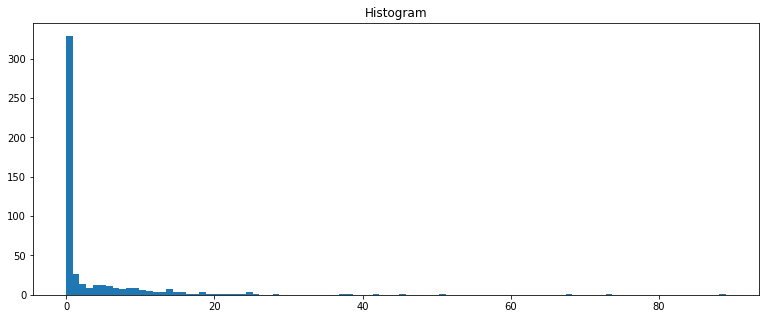

In [14]:
plt.hist(X[:,0], bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram")
plt.show()

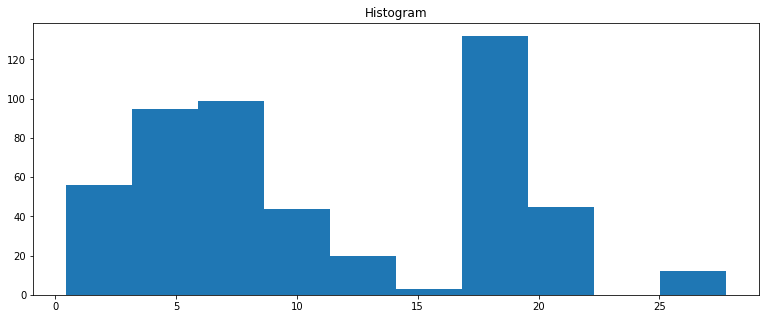

In [15]:
plt.hist(X[:,1], bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram")
plt.show()

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
# first two fatures of the boston data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train.copy(), 4)
X_test_scaled = scaler.transform(X_test.copy())

In [17]:
X_train_scaled[:10,]

array([[1.68762759e-01, 6.42962963e-01],
       [6.95009416e-03, 2.74074074e-01],
       [2.87746689e-04, 1.97037037e-01],
       [7.91456261e-02, 6.42962963e-01],
       [8.05623290e-03, 2.74074074e-01],
       [2.05469120e-03, 2.45925926e-01],
       [3.43385209e-04, 1.64814815e-01],
       [1.29148807e-04, 0.00000000e+00],
       [1.70491487e-01, 6.42962963e-01],
       [1.62186173e-01, 6.42962963e-01]])

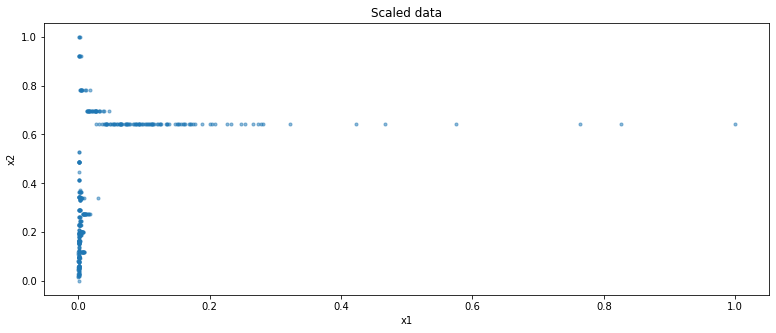

In [18]:
import numpy as np
import matplotlib.pyplot as plt
 
x1 = X_train_scaled[:,0]
x2 = X_train_scaled[:,1]


def plot_x1_x2(x1, x2):
    area = np.pi*3
    plt.scatter(x1, x2, s=area, alpha=0.5)
    plt.title('Scaled data')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()
    
plot_x1_x2(x1, x2)

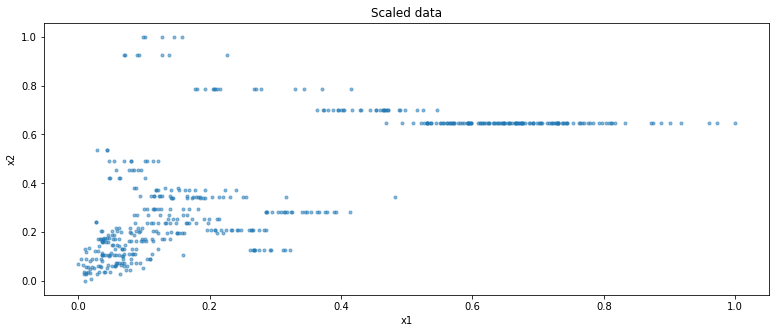

In [19]:
scaler = MinMaxScaler()
X[:,0] = np.log(X[:,0] + 0.1)
X_scaled = scaler.fit_transform(X.copy(), 4)
plot_x1_x2(X_scaled[:,0], X_scaled[:,1])

### Standard Scaler
One of the most popular methods for scaling data. This has the virtue of preserving relative distances between measurements. The outliers have an influence when computing the empirical mean and standard deviation. 
```
mean = X.mean()
std = X.std()
X = (X - mean)/std
```

Exercise: Reproduce the previous example with standard scaler.

### Outliers
There are valid reasons for throwing away outliers. For example, a measurement resulting from a human error. In general  throwing away observations is a questionable practice. 

**Summary**: if we see outliers that don't make sense you can discard observations with > 99% quantile or <1% quantile. Or you can "clip" by changing the values to the 99% quantile or 1% quantile. Here is an example.

```
{92, 19, 101, 58, 1053, 91, 26, 78, 10, 13, -40, 101, 86, 85, 15, 89, 89, 28, -5, 41} 
to
{92, 19, 101, 58, 101, 91, 26, 78, 10, 13, -5, 101, 86, 85, 15, 89, 89, 28, -5, 41} 
```

Models (such as linear regression) are highly senitive to outliers. Read more on outliers [here](https://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/)

In [20]:
import scipy.stats
import numpy as np
a = np.array([92, 19, 101, 58, 1053, 91, 26, 78, 10, 13, -40, 101, 86, 85, 15, 89, 89, 28, -5, 41])
scipy.stats.mstats.winsorize(a, limits=0.05)

masked_array(data=[ 92,  19, 101,  58, 101,  91,  26,  78,  10,  13,  -5,
                   101,  86,  85,  15,  89,  89,  28,  -5,  41],
             mask=False,
       fill_value=999999)

### Engineering new features: Rank transformation
Example: rank([-100, 0, 10000]) = [1,2,3]

* It smooths out unusual distributions and is less influenced by outliers than scaling methods.
* It distort correlations and distances within and across features. 
* Provides non-linear transformations in which distances between marginal outliers and inliers are shrunk.

In [99]:
scipy.stats.rankdata([-100,-100,0,100000])

array([1.5, 1.5, 3. , 4. ])

### Engineering new features: Power transformations
A common way of analyzing data that is not normally distributed is to transform it so that it become closer to normal. In particular, if your data is right-skewed you can use log or square root.
```
np.log(x + 1)
np.sqrt(x + 1)
```

What is the effect of these transformations on outliers?

## Categorical and ordinal features

Ordinal = Ordered categorical features.

**Summary**:
    * Label encoding can be used by tree-based method. 
    * For non tree-based method use one-hot-encoding (or embeddings which will be discussed later)
    * High cardinality can create very sparse data. One-hot-encoding can be used with sparse matrices.
    * Difficult to impute missing values. NA can be treated as another category.

### Label encoding
Encode labels with value between 0 and n_classes-1. It is used to transform non-numerical labels to numerical labels. This method is usedful for **tree-based** methods.

In [100]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [101]:
df = pd.DataFrame({'A':['a','b','c'],
                   'B':['T1','T1','T3']})
df

,A,B
0,a,T1
1,b,T1
2,c,T3


In [102]:
df.apply(lambda x: pd.factorize(x)[0])

,A,B
0,0,0
1,1,0
2,2,1


In [103]:
# you may need to do this first to the validation or test set
df = pd.DataFrame({'A':['a','b','b','c']})
pd.Categorical(df['A'], categories=['a', 'b'])

[a, b, b, NaN]
Categories (2, object): [a, b]

In [104]:
df.apply(lambda x: pd.factorize(x)[0])

,A
0,0
1,1
2,1
3,2


### One-hot encoding

* Often used for linear models
* Produces very high dimensionality, this causes an increase in the model’s training and serving time and memory consumption.
* Can easily cause a model to overfit the data.
* Can’t handle categories that weren’t in the training data (e.g new city or device type). This can be problematic in domains that change all the time.
* Some of this disadvantages can be reduced by encoding all rare categories to the same features ("Other"). This method can reduce the dimensionality drastically in some datasets with a small or no decrease in performance. 

### Label encoding versus one-hot encoding

When to use label encoding versus one-hot encoding.

Tree based methods:
* When categorical feature is ordinal **label encoding** can lead to better quality if it preserves correct order of values. In this case a split made by a tree will divide the feature to values 'lower' and 'higher' that the value chosen for this split.

Non-tree based methods:
* One-hot encoding or embedings should be used.
* Unless there is a linear relashionship between the label encoding and the dependent variable non-tree based methods will have a hard time with label encoding.


One-hot encoding a categorical feature with huge number of values can lead to high memory consumption. You can use sparse matrices to deal with this problem. You can also ignore a subset of the categories that are rare to decrease the number of new features. 

### Feature hashing (hashing trick)
Hashes the high dimensional input vectors $x \in {\rm I\!R}^n$ into a lower dimensional feature space ${\rm I\!R}^m$ where $m << n$. The hashing-trick preserves sparsity and approximately preserves the Euclidean norm.

It is often use for representing text but it can also be used for in settings with a large number of categories.

Pros:
* It is low dimensional thus it is very efficient in processing time and memory. 
* It can be computed online (without seeing all the data)

Cons:
* Hashing functions sometimes have collision so if H(New York) = H(Tehran) the model can’t know what city were in the data. Studies have shown that collisions usually doesn’t affect significantly on the models performance. 
* Hashed features are not interpretable so doing things like feature importance and model debugging is very hard.

In [135]:
# This functions outputs a scipy.sparse matrices 
from sklearn.feature_extraction import FeatureHasher
h = FeatureHasher(n_features=5)
D = [{'dog': 1, 'cat':2, 'elephant':4},{'dog': 2, 'run': 5}]
f = h.transform(D)
f.toarray()

array([[ 0.,  0., -4., -1.,  2.],
       [ 0.,  0.,  0., -2., -5.]])

In [127]:
data = pd.DataFrame({
        'state': ['Ohio', 'Ohio', 'San Francisco', 'Nevada', 'Nevada', 'San Jose'],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 2.4]})
y = np.array([0, 0, 1, 1, 1, 0])

In [128]:
data

,state,pop
0,Ohio,1.5
1,Ohio,1.7
2,San Francisco,3.6
3,Nevada,2.4
4,Nevada,2.9
5,San Jose,2.4


In [140]:
h = FeatureHasher(n_features=3)
D = [{x: 1} for x in data.state.values]
D # sparse representation of a one-hot encoding

[{'Ohio': 1},
 {'Ohio': 1},
 {'San Francisco': 1},
 {'Nevada': 1},
 {'Nevada': 1},
 {'San Jose': 1}]

In [141]:
D = [{x: 1} for x in data.state.values]
f = h.transform(D)
f.toarray()

array([[-1.,  0.,  0.],
       [-1.,  0.,  0.],
       [ 0.,  0.,  1.],
       [ 0.,  0., -1.],
       [ 0.,  0., -1.],
       [ 0., -1.,  0.]])

## Date and time features

* Periodicity
    * Day number in week, month, season, year, second, minute, hour
* Time since
* Difference between dates

## Coordinates features

* Distance to interesting points from external data or training data
* Cluster your data and use the center of the cluster to compute distances
* Compute agregated statistics
    * Mean sale price per neighbourhood

## Missing values

* Missing values can be hidden (replaced by a number 9999 or ?)
* Replacing missing values
    * mean, median
    * -999 works for tree-based methods
* Prediction Model: Create a model to estimate values that will substitute the missing data. Divide the data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.
* KNN(k-nearest neighbor) Imputation: The missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function.
* Add a new column is_null for every feature with missing values.
* Some methods/ packages can handle missing values.

## Feature extraction from text
We will talk about this in week 5.

## Feature Engineering: Frequency encoding

Each category is replaced by the frequency of that category in the training data. Used for tree-based methods.
```
["a", "a", "a", "b", "c"]
```
is encoded as
```
[3/5, 3/5, 3/5, 1/5, 1/5]
```

## Feature Engineering: Target or mean encoding
Use the target varible to generate features

In [123]:
data = pd.DataFrame({
        'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'y': [1, 1, 0, 0, 0]})
data

,state,y
0,Ohio,1
1,Ohio,1
2,Ohio,0
3,Nevada,0
4,Nevada,0


In [124]:
m =  pd.DataFrame({'y_mean' : data["y"].groupby(data["state"]).mean()}).reset_index()
m

,state,y_mean
0,Nevada,0.000000
1,Ohio,0.666667


In [125]:
pd.merge(data, m, how="left", on=["state"])

,state,y,y_mean
0,Ohio,1,0.666667
1,Ohio,1,0.666667
2,Ohio,0,0.666667
3,Nevada,0,0.000000
4,Nevada,0,0.000000


Note that mean encodoing needs to be computed on train and joined latter with validation and test.

Regularized mean encoding for the homework.

# Aggregation and distance based features

For this section let's think about the CTR we described avobe. We have categorical features like `site_id`, `app_id`, `device_ip` and numerical features like `C14`, `C15` etc...

BTW, not sure that in this case `C14`, `C15` should be considered numerical features but let's assume they are for now.

## Aggregate by one or multiple categorical features

Here are some fetures that we can compute
* Number of times `device_ip` appears on the training data. It would be better if we had `user_id`.
* Number of times `device_ip` appears per month on the training data.
* Min, max, average `C1` per `site_id`.

We can compute these features using `groupby` to aggregate to a new dataframe and then use `merge` to make the new feature.

## Features based on KNN
$K$ nearest neighbor (KNN) classifier. Looks at the $K$ points in the training set that are nearest to the test input $x$ and returns the mean of the target variable. 

There are many other possibilities here. 

# Features from semi-structure or unstructure data

## Web log data
Search tokens, videos watched, web page visits, items in the cart

## Medical history (electronic medical records)

### Feature eng lab
Download the file diabetes_json.zip. To look at the data type this in your terminal: <br>

`cat train.txt | jq | less`

The goal of this data challenge is to predict that a patient is going to be diagnosed with diabetes based on previous medical history. Each patient has "observations" which are a set of clinical test. Some patients have "resources" which provides codes for some of the diseases they have. To understand which patients have diabetes we will look at codes starting with icd9 and icd10.

icd9_250.00 is a diabetes code. Here are others.

http://www.hcpro.com/HIM-282660-8160/ICD9CM-vs-ICD10CM-Examine-the-differences-in-diabetes-coding.html

This is a web site in you can check what code means.
http://eicd10.com/index.php?srchtext=250.01&Submit=Convert&action=convert

Exercise: Compute features in the form of csv file. The target would be 1 if the patient was diagnosed with diabetes and 0 otherwise.

# References

* https://www.slideshare.net/HJvanVeen/feature-engineering-72376750?trk=v-feed
* https://www.coursera.org/learn/competitive-data-science
* http://scikit-learn.org/stable/modules/preprocessing.html
* https://github.com/amueller/introduction_to_ml_with_python/blob/master/04-representing-data-feature-engineering.ipynb
* Introduction to Machine Learning with Python. Muller & Guido Chapter 4.
* https://blog.myyellowroad.com/using-categorical-data-in-machine-learning-with-python-from-dummy-variables-to-deep-category-66041f734512
* https://www.dataquest.io/blog/pandas-big-data/
* https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

In [25]:
# ideas for hw https://www.csie.ntu.edu.tw/~r01922136/slides/kaggle-avazu.pdf